# GEOF 236 Modelling Activity

Write a report of the modelling day, containing at least:

* A short introduction to NP(Z) modelling and the methods we used in doing the exercises <br>
* The answers to all exercises* (figures), including what you observed and why <br>
* Explain everything as if you are explaining it to a fellow student<br>
* A general conclusion of what you have learned through doing the exercises <br>

Chapter 4 in Sarmiento & Gruber (2006) would be useful to understand the dynamics of the model. 
Do not forget to do spell-checking, put your name(s) on the report and in the file name, and hand them in in pdf format. Working together (f.e., discussing the results) between groups is OK, but make your own plots and write your own text.

**Note that you need to pass in order to take the exam.**

## N-P Model 

### Three different experiments were carried out with varying Nitrate and Phytoplankton initial concentrations. 

The N-P model in Figure 4.3.4 (Sarmiento & Gruber 2006) has two components which require two conservation equations. Some assumptions need to be made in order to simplify the model, such as negligable contribution of mixing and advection and sinking of organic matter. We also assume that the light supply is not limit growth (Equation 4.3.6):

$$ \dfrac{dP(t)}{dt} = P V_{max} \dfrac{N}{K_N + N} - P\lambda_P$$

Where $V_{max}$ is the "maximum growth rate", $K_N$ is the "half saturation constant" for N and $\lambda_P$ is the "mortality rate" for P. 


A steady state solution also requires that the supply of N from P decay must be balanced by the photosynthetic uptake, therefore we add the term $\mu_p$ (Equation 4.3.7):

$$ \dfrac{dN(t)}{dt} = -P V_{max} \dfrac{N}{K_N + N} + P \mu_p \lambda_P$$

Where the first term in the right hand side is the removal of nitrate from P and the second is the supply due to decay of P.   


#### Experiment 1: Low Nitrogen
The initial values are: <br>
* P$_{t0}$ = 0.003 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>


#### Experiment 2a: High Nitrogen
The initial values are: <br>
* P$_{t0}$ = 0.01 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>

#### Experiment 2b: High Nitrogen
The initial values are: <br>
* P$_{t0}$ = 0.03 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>

In [156]:
# First we import the libraries we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

# Clone github repository 
!git clone https://github.com/xabi94davi/GEOF_236.git

# Set the working directory
os.chdir('GEOF_236')

#import model functions eco_NP and eco_NPZ
from NPZ_Model import eco_NP, eco_NPZ

Cloning into 'GEOF_236'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 7), reused 18 (delta 3), pack-reused 0
Unpacking objects: 100% (32/32), 710.83 KiB | 950.00 KiB/s, done.


In [40]:
# Specify initial conditions for Phytoplankton (P_t0) and Nitrate (N_t0) 
P_t0 = 0.03
N_t0 = 0

# Call the eco_NP model from NPZ_model module file
P, N, Total_N, time = eco_NP(P_t0, N_t0) # P = Phytoplankton, N = Dissolved Nitrate, Total_N = Total Nitrate

%reload_ext autoreload
%autoreload 2

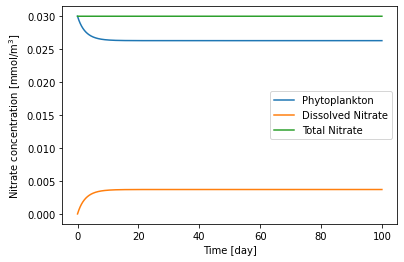

In [41]:
#Plot figure
plt.plot(time[:-1], P[:-1], label = 'Phytoplankton')
plt.plot(time[:-1], N[:-1], label='Dissolved Nitrate')
plt.plot(time[:-1], Total_N[:-1], label = 'Total Nitrate')
plt.xlabel('Time [day]')
plt.ylabel('Nitrate concentration [mmol/m$^3$]')
plt.legend()

## N-P-Z Model

### Three different experiments were carried out with varying Nitrate, Phytoplankton and Zooplankton initial concentrations. 

Since the presence of Z affects P due to grazing, now we also have to modify the equations for P (Equation 4.3.11):

$$ \dfrac{dP(t)}{dt} = P V_{max} \dfrac{N}{K_n + N} - P\lambda_P - Zg \dfrac{P}{K_p}$$

Where the first term on the right hand side is the growth of P, the second term is the loss of P due to its decay, and the third is the loss due to grazing by Z. 



For Zooplankton, we have growth due to grazing, $\gamma_Z g \dfrac{P}{K_p}$,  and also mortality, $\lambda_Z$ (Equation 4.3.12):

$$ \dfrac{dZ(t)}{dt} = Z \gamma_Z g \dfrac{P}{K_p} - Z\lambda_Z$$

Where $\gamma_Z$ is the "assimilation efficency", $g$ is the "maximum growth rate". 


Same goes for Nitrate (Equation 4.3.13): 

$$ \dfrac{dN(t)}{dt} = -P V_{max} \dfrac{N}{K_n + N} + Z\mu_Z(1-\gamma_Z)g\dfrac{P}{K_p} + \mu_p \lambda_P + Z\mu_Z\lambda_Z $$

Where $\mu_Z$ is the fraction of zooplankton losses and unassimilated organic nitrogen that is remineralized. Where the first term is the loss of N due to uptake by P, the second term is the remineralization of Z excretions. The last two terms refers to the remineralization of P and the Z, respectively. In addition  ($1-\gamma_Z$) represents the unassimilated fraction of the grazing of Z on P. 


#### Experiment 1a: 
The initial values are: <br>
* P$_{t0}$ = 0.03 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>
* Z$_{t0}$ = 0.01 mmol/m$^3$ <br>


#### Experiment 2a High Nitrogen:
The initial values are: <br>
* P$_{t0}$ = 1.5 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>
* Z$_{t0}$ = 0.1 mmol/m$^3$ <br>

#### Experiment 2b High Nitrogen: 
The initial values are: <br>
* P$_{t0}$ = 2.0 mmol/m$^3$ <br>
* N$_{t0}$ = 1.0 mmol/m$^3$ <br>
* Z$_{t0}$ = 1.0. mmol/m$^3$ <br>

Compare the results to the NP model case 2b!

In [4]:
# Specify initial conditions for Phytoplankton (P_t0), Nitrate (N_t0) and Zooplankton (Z_t0)
P_t0 = 2
N_t0 = 1
Z_t0 = 1

# Call the eco_NPZ model from NPZ_model module file
P, N, Z, Total_N, time = eco_NPZ(P_t0, N_t0, Z_t0) # P = Phytoplankton, N = Dissolved Nitrate, Z= Zooplankton, Total_N = Total Nitrate


%reload_ext autoreload
%autoreload 2

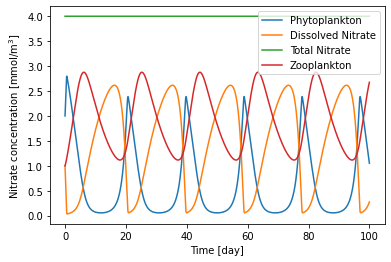

In [5]:
#Plot figure
plt.plot(time[:-1], P[:-1], label = 'Phytoplankton')
plt.plot(time[:-1], N[:-1], label = 'Dissolved Nitrate')
plt.plot(time[:-1], Total_N[:-1], label = 'Total Nitrate')
plt.plot(time[:-1], Z[:-1], label = 'Zooplankton')
plt.xlabel('Time [day]')
plt.ylabel('Nitrate concentration [mmol/m$^3$]')
plt.legend()

# Two Box (Surface-Deep) N-P 

In [154]:
from NPZ_Model import eco_NP_deep # with seasonal mixing

# Specify initial conditions for Phytoplankton (P_t0), Surface Nitrate (Ns_t0) and Deep Nitrate (Nd_t0)
P_t0 = 0.003
Ns_t0 = 0
Nd_t0 = 0.01

# Call the eco_NPZ model from NPZ_model module file

seasons = True #False
P, Ns, Nd, Total_N, time = eco_NP_deep(P_t0, Ns_t0, Nd_t0,seasons) # P = Phytoplankton, N = Dissolved Nitrate, Z= Zooplankton, Total_N = Total Nitrate


%reload_ext autoreload
%autoreload 2

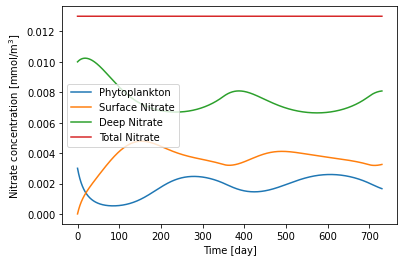

In [155]:
#Plot figure
plt.plot(time[:-1], P[:-1], label = 'Phytoplankton')
plt.plot(time[:-1], Ns[:-1], label = 'Surface Nitrate')
plt.plot(time[:-1], Nd[:-1], label = 'Deep Nitrate')
plt.plot(time[:-1], Total_N[:-1],label = 'Total Nitrate')

plt.xlabel('Time [day]')
plt.ylabel('Nitrate concentration [mmol/m$^3$]')

plt.legend()